This notebook deals with the contents in Sections 4.4.1-4.4.11.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel

# Load and show data

In [2]:
df = pd.read_csv("./data/data-salary.txt")
print(df.count())
df.head(5)

X    20
Y    20
dtype: int64


,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


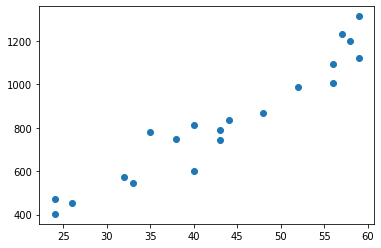

In [3]:
# Fig 4.2
plt.plot(df["X"], df["Y"], 'o')

# Run Stan

In [4]:
model = CmdStanModel(stan_file="model/model4-5.stan")
print(model)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/Chap04/model/model4-5


CmdStanModel: name=model4-5
	 stan_file=/workdir/Chap04/model/model4-5.stan
	 exe_file=/workdir/Chap04/model/model4-5
	 compiler_optons=stanc_options=None, cpp_options=None


In [5]:
data = {
    "N": len(df),
    "X": df["X"].values,
    "Y": df["Y"].values
}

In [6]:
fit = model.sample(data=data)  
# By default, cmdstanpy does not save warmup draws.
# To save warmup draws, set save_warmup=True in the sample method

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3


# Access the result

In [7]:
type(fit) # See https://cmdstanpy.readthedocs.io/en/latest/api.html#cmdstanmcmc

cmdstanpy.stanfit.CmdStanMCMC

In [8]:
fit

CmdStanMCMC: model=model4-5 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmp7bfvk4ik/model4-5-202009090611-1-qnskki8f.csv
	/tmp/tmp7bfvk4ik/model4-5-202009090611-2-jw9daidn.csv
	/tmp/tmp7bfvk4ik/model4-5-202009090611-3-53viob5m.csv
	/tmp/tmp7bfvk4ik/model4-5-202009090611-4-pstn2itp.csv
 output_files:
	/tmp/tmp7bfvk4ik/model4-5-202009090611-1-qnskki8f-stdout.txt
	/tmp/tmp7bfvk4ik/model4-5-202009090611-2-jw9daidn-stdout.txt
	/tmp/tmp7bfvk4ik/model4-5-202009090611-3-53viob5m-stdout.txt
	/tmp/tmp7bfvk4ik/model4-5-202009090611-4-pstn2itp-stdout.txt

In [9]:
print(fit.chains)
print(fit.chain_ids)

4
[1, 2, 3, 4]


In [10]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 10)


In [11]:
fit.column_names

('lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__',
 'a',
 'b',
 'sigma')

In [12]:
fit.stan_variables()

{'a': array([-200.089 , -231.466 ,  -63.6803, ..., -177.149 , -229.565 ,
        -223.178 ]),
 'b': array([23.2881, 24.6966, 20.368 , ..., 23.4733, 24.6068, 24.4649]),
 'sigma': array([88.047 , 77.4292, 66.7657, ..., 97.6535, 73.2007, 90.2501])}

In [13]:
for key, val in fit.stan_variables().items():
    print(key, val.shape)

a (4000,)
b (4000,)
sigma (4000,)


In [14]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-93.6522,0.040445,1.35662,-96.2808,-93.2979,-92.21760,1125.11,3472.55,1.00081
a,-122.3440,2.089110,72.50260,-240.2390,-122.0720,-6.79843,1204.44,3717.41,1.00275
b,21.9652,0.046386,1.61977,19.3604,21.9643,24.61430,1219.34,3763.39,1.00237
sigma,85.1273,0.449683,16.22630,62.6657,82.6761,114.07800,1302.05,4018.66,1.00039


# Diagnostics

In [15]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmp7bfvk4ik/model4-5-202009090611-1-qnskki8f.csv, /tmp/tmp7bfvk4ik/model4-5-202009090611-2-jw9daidn.csv, /tmp/tmp7bfvk4ik/model4-5-202009090611-3-53viob5m.csv, /tmp/tmp7bfvk4ik/model4-5-202009090611-4-pstn2itp.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmp7bfvk4ik/model4-5-202009090611-1-qnskki8f.csv, /tmp/tmp7bfvk4ik/model4-5-202009090611-2-jw9daidn.csv, /tmp/tmp7bfvk4ik/model4-5-202009090611-3-53viob5m.csv, /tmp/tmp7bfvk4ik/model4-5-202009090611-4-pstn2itp.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


In [16]:
az_data = az.from_cmdstanpy(fit)

In [17]:
az_data

Inference data with groups:
	> posterior
	> sample_stats

# Visualizing the samples

## autocorrelation

array([[<AxesSubplot:title={'center':'a\n0'}>,
        <AxesSubplot:title={'center':'a\n1'}>,
        <AxesSubplot:title={'center':'a\n2'}>,
        <AxesSubplot:title={'center':'a\n3'}>]], dtype=object)

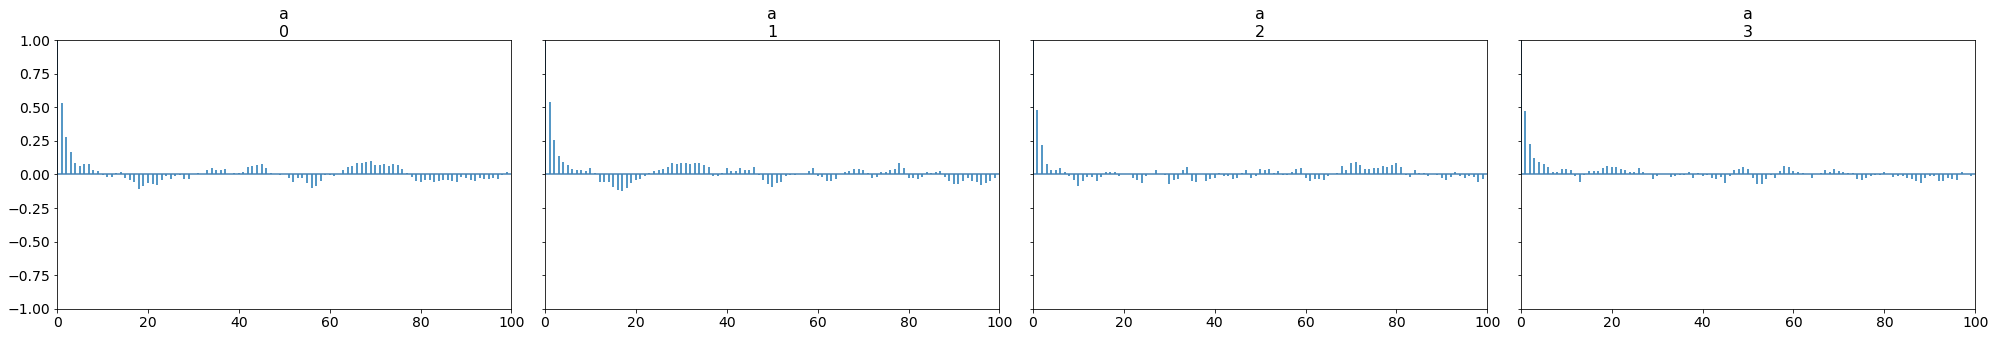

In [18]:
az.plot_autocorr(az_data, var_names=["a"])

array([[<AxesSubplot:title={'center':'b\n0'}>,
        <AxesSubplot:title={'center':'b\n1'}>,
        <AxesSubplot:title={'center':'b\n2'}>,
        <AxesSubplot:title={'center':'b\n3'}>]], dtype=object)

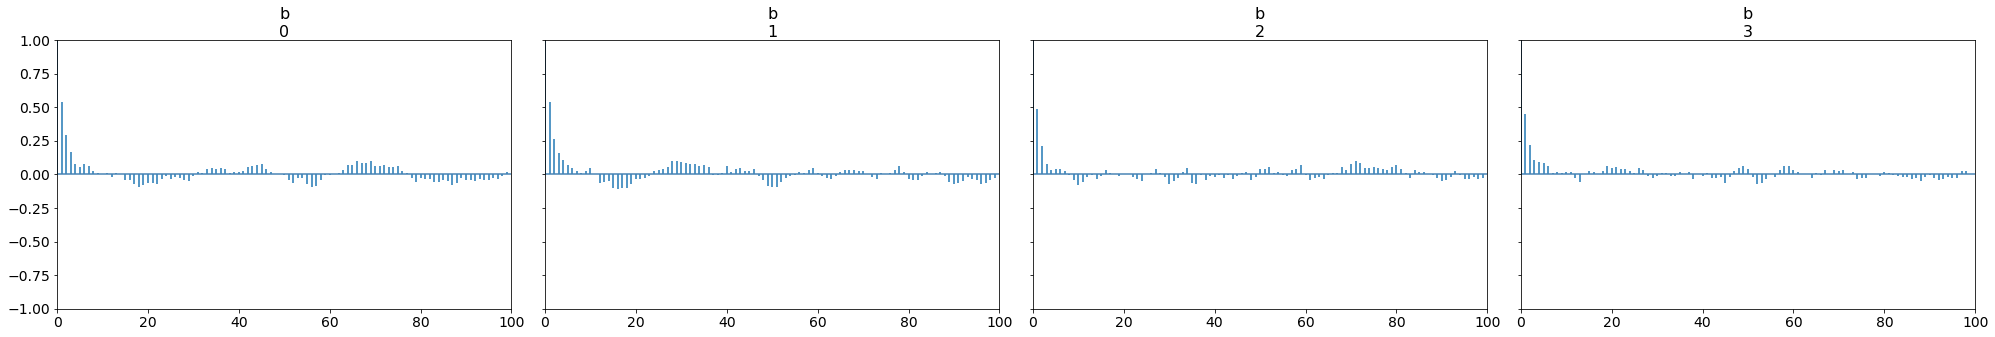

In [19]:
az.plot_autocorr(az_data, var_names=["b"])

array([[<AxesSubplot:title={'center':'sigma\n0'}>,
        <AxesSubplot:title={'center':'sigma\n1'}>,
        <AxesSubplot:title={'center':'sigma\n2'}>,
        <AxesSubplot:title={'center':'sigma\n3'}>]], dtype=object)

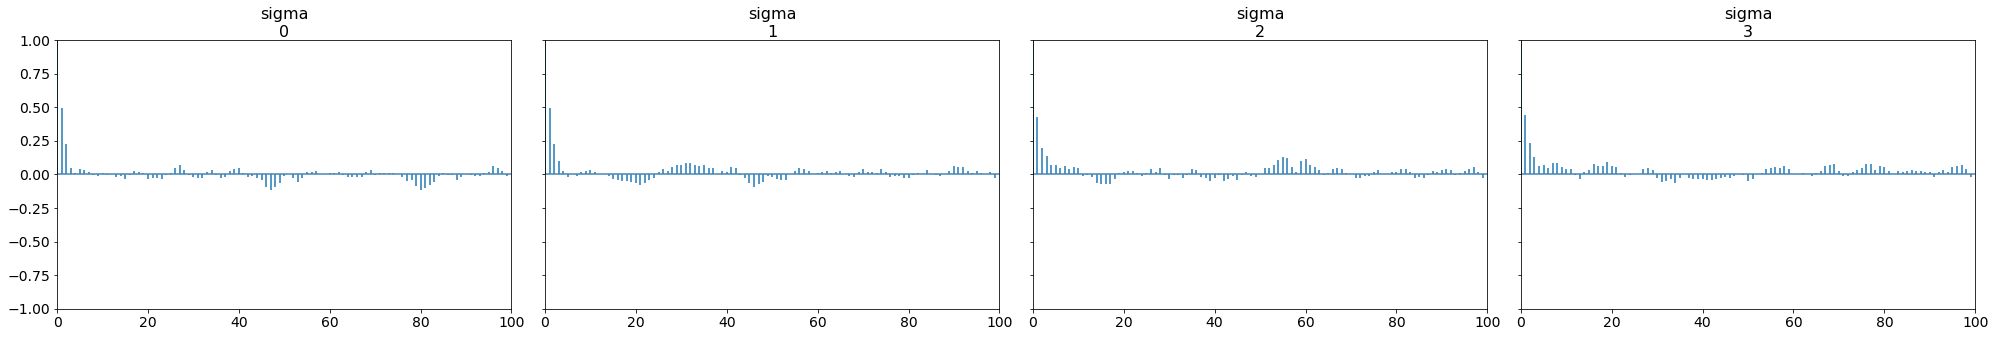

In [20]:
az.plot_autocorr(az_data, var_names=["sigma"])

## density

array([<AxesSubplot:title={'center':'a'}>,
       <AxesSubplot:title={'center':'b'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

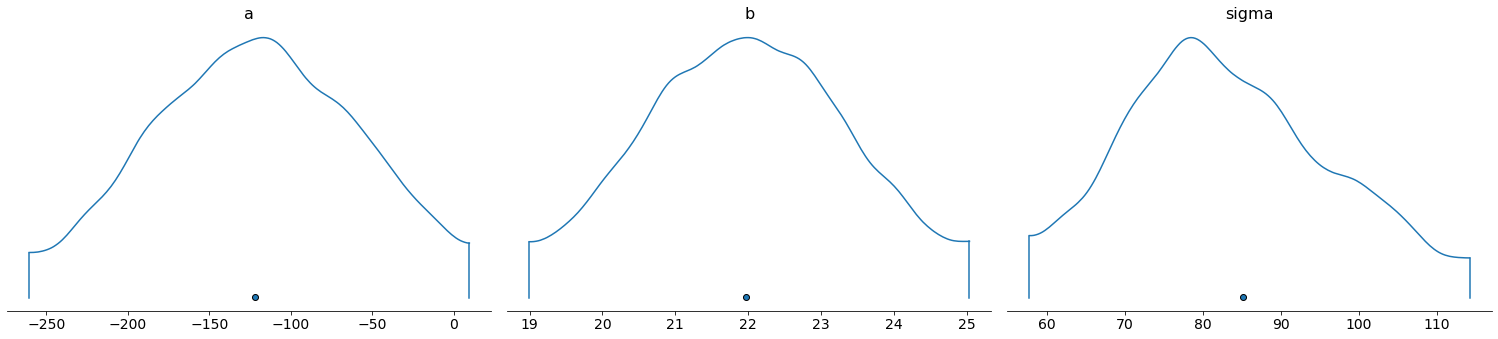

In [21]:
az.plot_density(az_data)

## trace plot

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

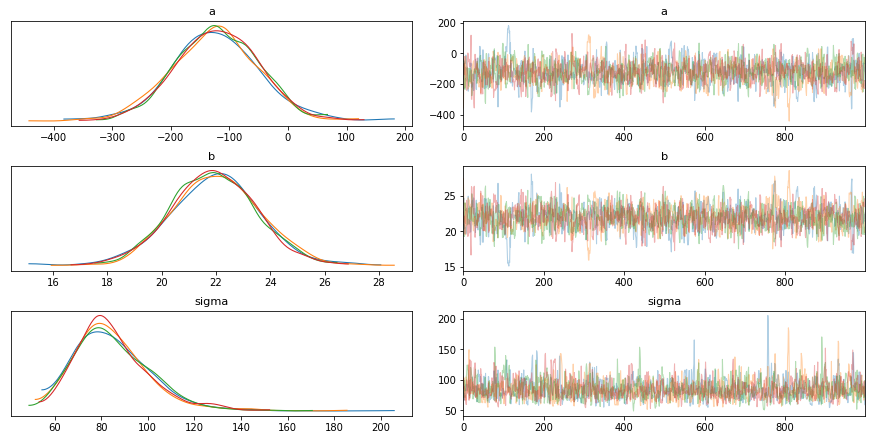

In [22]:
az.plot_trace(az_data)

## pair plot

array([[<AxesSubplot:ylabel='b'>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='a', ylabel='sigma'>,
        <AxesSubplot:xlabel='b'>]], dtype=object)

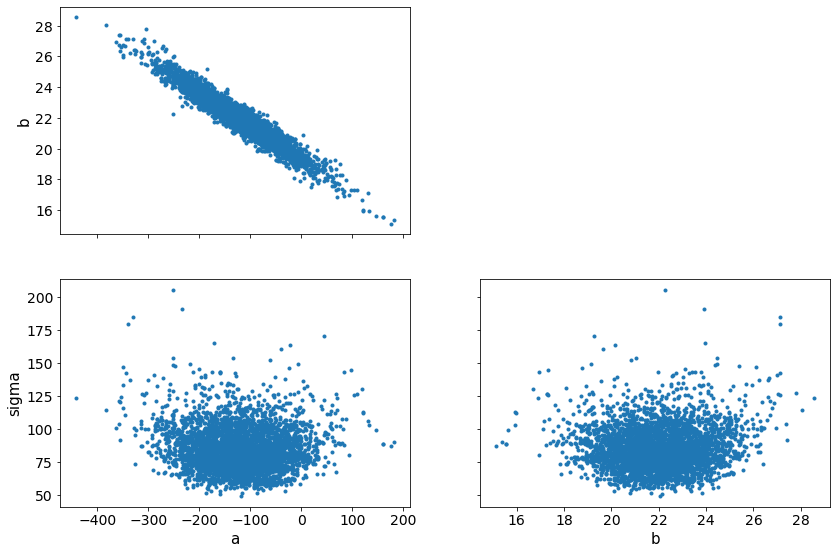

In [23]:
az.plot_pair(az_data)

# Predictive distribution

Manually calculate predictive distribution from posterior samples

In [24]:
mcmc_samples = fit.stan_variables()
for k, v in mcmc_samples.items():
    print(k, v.shape)

a (4000,)
b (4000,)
sigma (4000,)


In [25]:
age_low = 23
age_high = 60
ages = np.arange(age_low, age_high + 1, 1)

N_mcmc = len(mcmc_samples["a"])
y_base_samples = np.zeros((len(ages), N_mcmc))
y_pred_samples = np.zeros((len(ages), N_mcmc))

for i, age in enumerate(ages):
    y_base_samples[i] = mcmc_samples["a"] + mcmc_samples["b"] * age
    y_pred_samples[i] = np.random.normal(loc=y_base_samples[i], scale=mcmc_samples["sigma"])

In [26]:
y_base_percentiles = np.percentile(y_base_samples, [2.5, 25.0, 50.0, 75.0, 97.5], axis=1)
y_pred_percentiles = np.percentile(y_pred_samples, [2.5, 25.0, 50.0, 75.0, 97.5], axis=1)

y_base_percentiles.shape, y_pred_percentiles.shape

((5, 38), (5, 38))

Text(0.5, 1.0, 'y')

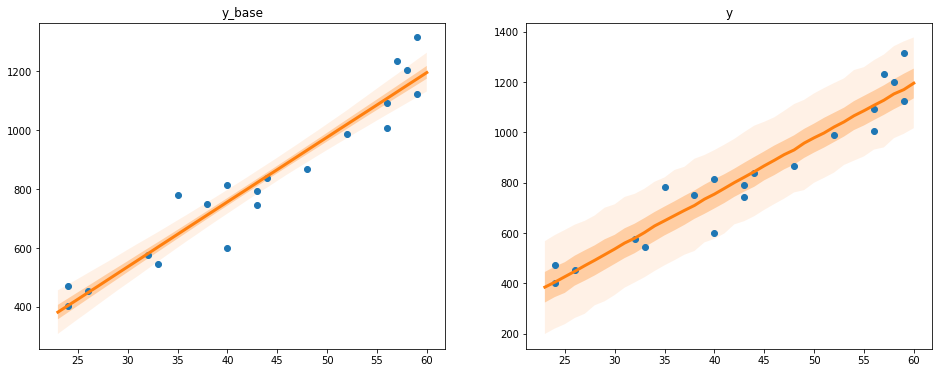

In [27]:
# Fig 4.8
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax = axes[0]
ax.plot(df["X"], df["Y"], "o")
ax.fill_between(ages, y_base_percentiles[0], y_base_percentiles[4], facecolor="C1", alpha=0.1)
ax.fill_between(ages, y_base_percentiles[1], y_base_percentiles[3], facecolor="C1", alpha=0.3)
ax.plot(ages, y_base_percentiles[2], color="C1", linewidth=3)
ax.set_title("y_base")

ax = axes[1]
ax.plot(df["X"], df["Y"], "o")
ax.fill_between(ages, y_pred_percentiles[0], y_pred_percentiles[4], facecolor='C1', alpha=0.1)
ax.fill_between(ages, y_pred_percentiles[1], y_pred_percentiles[3], facecolor='C1', alpha=0.3)
ax.plot(ages, y_pred_percentiles[2], color="C1", linewidth=3)
ax.set_title("y")